In [4]:
import pandas as pd
import seaborn as sb
import phik
from phik import resources, report
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv('kaggle_music_genre_train.csv')
df_test = pd.read_csv('kaggle_music_genre_test.csv')

In [6]:
df_train

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,47396.0,O Pato,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,4-Apr,0.942,Jazz
20390,44799.0,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,4-Apr,0.174,Rock
20391,33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,4-Apr,0.942,Alternative
20392,77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,4-Apr,0.215,Rap


In [7]:
df_test

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,50532,What We Gonna Do About It,0.108000,0.558,163049.0,0.767,0.00000,E,0.0954,-4.561,Minor,0.0491,158.019,4-Apr,0.715
5095,26255,Marilyn (feat. Dominique Le Jeune),0.131000,0.435,196216.0,0.641,0.00000,A#,0.2730,-7.274,Major,0.1040,115.534,3-Apr,0.156
5096,67924,Bipolar,0.152000,0.756,243373.0,0.787,0.00000,D,0.2050,-7.423,Major,0.2400,123.405,4-Apr,0.459
5097,79778,Dead - NGHTMRE Remix,0.001450,0.489,185600.0,0.974,0.63800,F#,0.1230,-2.857,Minor,0.0381,150.036,4-Apr,0.665


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


Я считаю, что instance_id , track_name, obtained_date надо выбросить

In [10]:
df_train = df_train.drop(['instance_id', 'track_name', 'obtained_date'], axis =1)
df_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,0.450,Country
1,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,0.539,Rock
2,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,0.344,Alternative
3,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,0.966,Hip-Hop
4,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,0.942,Jazz
20390,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,0.174,Rock
20391,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,0.942,Alternative
20392,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,0.215,Rap


In [11]:
df_test = df_test.drop(['instance_id', 'track_name', 'obtained_date'], axis =1)
df_test

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,0.895
1,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,0.318
2,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,0.412
3,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,0.614
4,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,0.121
...,...,...,...,...,...,...,...,...,...,...,...,...
5094,0.108000,0.558,163049.0,0.767,0.00000,E,0.0954,-4.561,Minor,0.0491,158.019,0.715
5095,0.131000,0.435,196216.0,0.641,0.00000,A#,0.2730,-7.274,Major,0.1040,115.534,0.156
5096,0.152000,0.756,243373.0,0.787,0.00000,D,0.2050,-7.423,Major,0.2400,123.405,0.459
5097,0.001450,0.489,185600.0,0.974,0.63800,F#,0.1230,-2.857,Minor,0.0381,150.036,0.665


Тут решил глянуть сколько будет классов

In [12]:
df_train['music_genre'].value_counts()

music_genre
Blues          2858
Alternative    2601
Electronic     2564
Rap            2428
Rock           2165
Country        2120
Anime          1901
Classical      1373
Jazz           1239
Hip-Hop        1145
Name: count, dtype: int64

Смотрю распределение некоторых переменных, которые мне интересны

Ниже видим, что модальность преобладает в основном мажорная с приблизительным соотношением 2:1

In [13]:
df_train['mode'].value_counts()

mode
Major    12828
Minor     7060
Name: count, dtype: int64

In [14]:
df_test['mode'].value_counts()

mode
Major    3177
Minor    1773
Name: count, dtype: int64

Смотрю распределение тональностей. Относительные доли примерно совпадают

In [15]:
df_train['key'].value_counts(ascending=True, normalize = True)

key
D#    0.030826
F#    0.061346
A#    0.062262
G#    0.064500
E     0.077115
B     0.077420
F     0.082202
A     0.102396
D     0.107330
C#    0.108093
C     0.109314
G     0.117198
Name: proportion, dtype: float64

In [16]:
df_test['key'].value_counts(ascending=True, normalize = True)

key
D#    0.031573
G#    0.063550
F#    0.067395
E     0.070633
A#    0.071645
B     0.080348
F     0.093908
A     0.094111
C#    0.100182
G     0.106659
C     0.107266
D     0.112730
Name: proportion, dtype: float64

Смотрим речевой характер

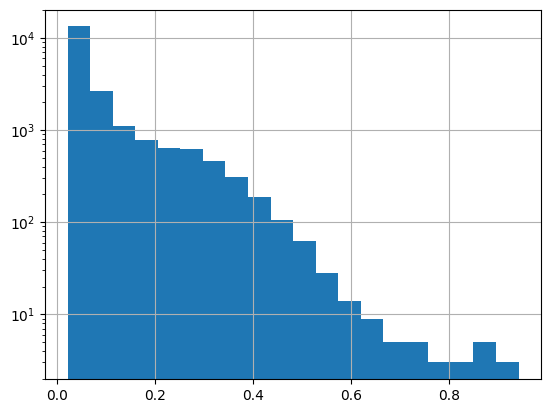

In [17]:
df_train['speechiness'].hist(bins = 20)
plt.yscale('log')

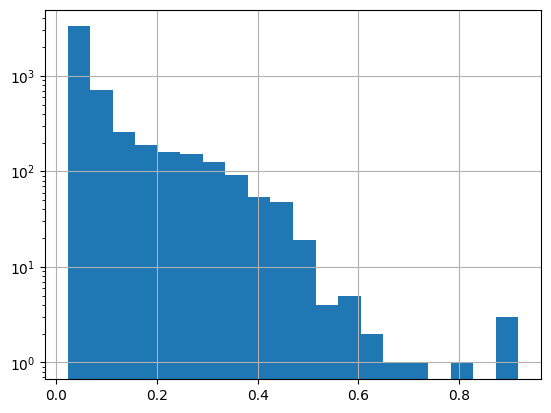

In [18]:
df_test['speechiness'].hist(bins = 20)
plt.yscale('log')

По описанию значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.

Посмотрим на количество значений в диапазонах:  
  0 : 0.33  
  0.33 : 0.66  
  0.66 : 1.  

In [19]:
df_train[df_train['speechiness'] <= 0.33]['speechiness'].count()

19543

In [20]:
# df_train[df_train['speechiness'] <= 0.66]['speechiness'].count() - df_train[df_train['speechiness'] <= 0.33]['speechiness'].count()

In [21]:
df_train.query("`speechiness` >= 0.33 and `speechiness` <= 0.66")['speechiness'].count()

834

In [22]:
df_train[df_train['speechiness'] >= 0.66]['speechiness'].count()

25

Тестовый датасет смотреть не стал, на гистограмме видно, что относительные значения будут примерно такими же. Большинство треков - не речевые. Все что больльше 0.66 можно вообще отнести к выбросам и откинуть. Можно попробовать добавить новый признак на основе колонки speechiness, поделив на 3 или 2 класса.

<Axes: >

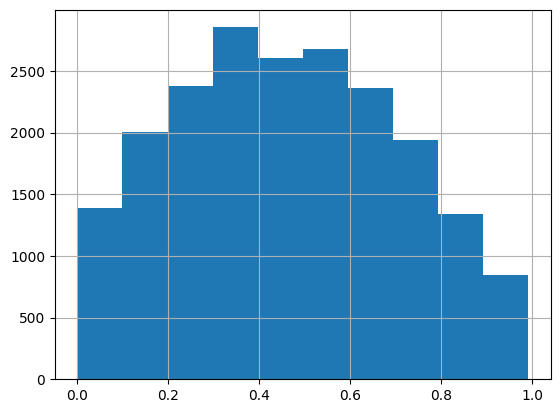

In [23]:
df_train['valence'].hist()

<Axes: >

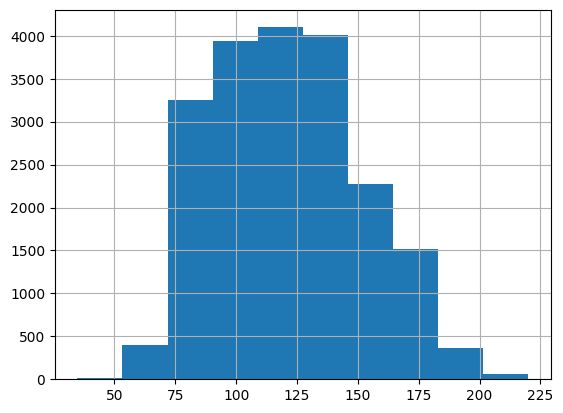

In [24]:
df_train['tempo'].hist()

Здесь видим подобие нормальных распределений, я бы трогать не стал.

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


<Axes: >

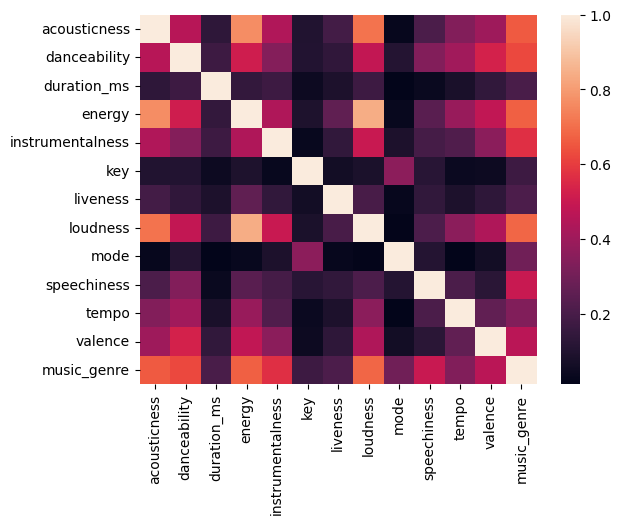

In [28]:
sb.heatmap(df_train.phik_matrix())

In [26]:
# sb.pairplot(df_train)

In [27]:
# sb.relplot(
#     x=df_train['danceability'],
#     y=df_train['acousticness'], 
#     # data=cars,
#     # palette='bright',
#     col=df_train['music_genre'])

In [28]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['acousticness'],
#     height=4, aspect=2)

In [29]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['danceability'],
#     height=4, aspect=2)

In [30]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['duration_ms'],
#     height=4, aspect=2)

In [31]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['energy'],
#     height=4, aspect=2)

In [32]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['instrumentalness'],
#     height=4, aspect=2)

In [33]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['key'],
#     height=4, aspect=2)

In [34]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['liveness'],
#     height=4, aspect=2)

In [35]:
# corr = df_train.drop(['key', 'mode', 'music_genre'],axis = 1).corr()
# plt.figure(figsize = (10,10))

# sb.heatmap(corr, cmap="Blues", annot=True,  fmt=".1f")
# plt.title('Тепловая карта корреляции переменных датасета', fontsize = 20)

In [36]:
df_test.duplicated().sum()

30